In [253]:
import numpy as np
import matplotlib.pylab as plt
from scipy.signal import hilbert

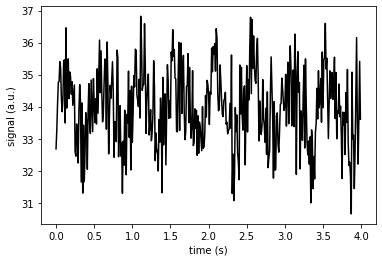

In [286]:
freq = 2
tstop, dt = 4, 1e-2
noise_amp = 1.
t = np.arange(int(tstop/dt))*dt
signal = np.sin(2*np.pi*t*freq+0.4) + noise_amp * np.random.randn(len(t)) +34 # sin + noise
plt.plot(t, signal, 'k-')
plt.xlabel('time (s)')
plt.ylabel('signal (a.u.)');

In [287]:
# Hilbert Tranform
Hilbert = hilbert(signal-signal.mean()) # Hilbert transform

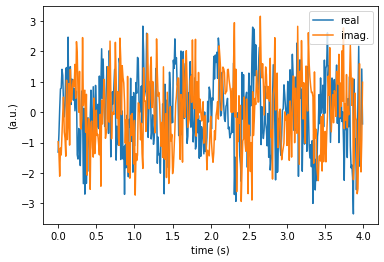

In [288]:
# plotting real and imaginary part
plt.plot(t, np.real(Hilbert), label='real')
plt.plot(t, np.imag(Hilbert), label='imag.')
plt.xlabel('time (s)')
plt.ylabel('(a.u.)')
plt.legend();

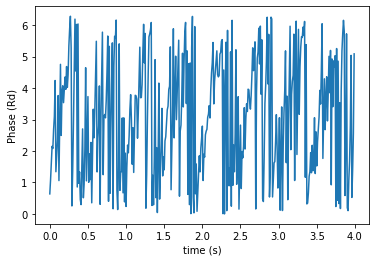

In [289]:
# extracting phase angle
plt.plot(t, np.angle(Hilbert)+np.pi) # from 0 to 2*Pi
plt.xlabel('time (s)')
plt.ylabel('Phase (Rd)');

Text(0, 0.5, 'cumsum-phase (Rd*second)')

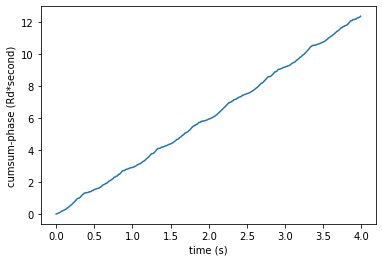

In [290]:
# cumsum
plt.plot(t, np.cumsum(np.angle(Hilbert)+np.pi)*dt, label='data')
plt.xlabel('time (s)')
plt.ylabel('cumsum-phase (Rd*second)')



- If the phase raises linearly over time with resets, one can calculate the cumulative phase over time:
$$
CP(t) = \frac{\lfloor t f \rfloor}{f} / f + \pi \cdot f * (t- \frac{\lfloor t f \rfloor}{f})^2 
$$
where $\lfloor \, \rfloor$ is the floor function.


- The linear approximation to the cumulated phase is simply:
$$
CP(t) = \pi*t
$$

In [291]:
# implementing the 
def func(t, freq=1):
    n = np.floor(t*freq)
    Dt = t-n/freq
    return n*np.pi/freq+np.pi*Dt**2*freq

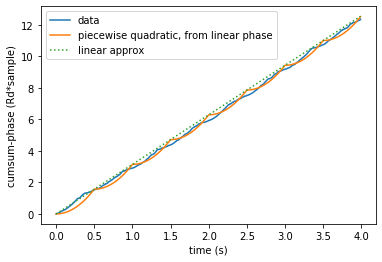

In [292]:
plt.plot(t, np.cumsum(np.angle(Hilbert)+np.pi)*dt, label='data')
plt.plot(t, func(t, freq=freq), label='piecewise quadratic, from linear phase')
plt.plot(t, np.pi*t, ':', label='linear approx')
plt.xlabel('time (s)')
plt.ylabel('cumsum-phase (Rd*sample)')
plt.legend()